# E-tivity 1 (27/01/25 - 09/02/25)

* Your Name: Dean McGarr

* Your Student ID: 23317639

## Anomaly Detection

### Context
We have a mystery dataset. There are 9 explanatory variables and one response variable. The response variable is the last column and indicates if the sample is anomalous (=1, valid =0). The dataset is provided "data.csv".

Of course in this case we could use supervised learning to generate a model and detect anomalies in new data. However the focus is on autoencoders, anomaly detection is just one of the potential uses for autoencoders.

So we are going to pretend that we do not know which data are anomalous but we do know that the anomaly rate is small. Use an autoencoder to detect anomalies in the data. The correctness of the model can of course be checked.

### Guidelines

The e-tivity is split into four tasks. The first three are "group" excersises, in that you post the solutions to Tasks 1-3 to a site. This will allow the members of your group to send you feedback (via the forums) so you can improve your submission. The final task is an individual task and together with the other tasks, should be uploaded to the Group Locker.

Marks will be deducted if task 4 is uploaded in contravention of instructions. Also if the the final submission is not a single notebook with tasks 1-4 and with correct identification or filename.

Grading guidelines: the scores for each task are additive. Below is a link to the E-tivity rubrics.

https://learn.ul.ie/d2l/lp/rubrics/preview.d2l?ou=49284&rubricId=2620&originTool=quicklinks



## Problem

If you train even a modest feed forward network via supervised learning you can get extremely good recall and precision, despite the unbalanced dataset. However in this e-tivity you will determining the anomalies by using an autoencoder. That is you will **not** be using the Anom flag to guide the training.

The mystery dataset is available from Brightspace, download the csv file and use it as the input data.

### Tasks 1-3 (complete by Sunday 02/02/25)

The initial implementation of the tasks are to be uploaded to the locker on which the other group members can comment. The forum activity will form part of the overall mark for the e-tivity.

**Task 1: data preprocessing**

Explain any preprocessing steps you take and also how you have selected the training and test sets. Remember we do not know which samples are anomalous only that there are a small number of them compared to the total sample size.


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

In [8]:
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/My Drive/data.csv"
data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# 1. Check the shape (number of rows and columns)
print("Shape of the dataset:", data.shape)

# 2. View basic information about the dataset
print("\nDataset info:")
data.info()

# 3. View a summary of the dataset
print("\nSummary statistics:")
print(data.describe(include="all"))  # Includes stats for numeric, categorical, and other data types

Shape of the dataset: (49097, 10)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49097 entries, 0 to 49096
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      49097 non-null  int64
 1   V2      49097 non-null  int64
 2   V3      49097 non-null  int64
 3   V4      49097 non-null  int64
 4   V5      49097 non-null  int64
 5   V6      49097 non-null  int64
 6   V7      49097 non-null  int64
 7   V8      49097 non-null  int64
 8   V9      49097 non-null  int64
 9   Anom    49097 non-null  int64
dtypes: int64(10)
memory usage: 3.7 MB

Summary statistics:
                 V1            V2            V3            V4            V5  \
count  49097.000000  49097.000000  49097.000000  49097.000000  49097.000000   
mean      46.932399     -0.063955     85.123124      0.213231     36.871784   
std       12.875159     84.674481      8.877517     37.579171     19.963113   
min       27.000000  -4821.000000     21.00000

In [10]:
# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

# Check for duplicate rows
print("Number of duplicate rows:", data.duplicated().sum())

# Drop the anomaly column since autoencoders are unsupervised
X = data.drop(columns=["Anom"])

# Standardize the features (zero mean, unit variance) - Important for autoencoders
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets (80-20 split)
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)


Missing values per column:
 V1      0
V2      0
V3      0
V4      0
V5      0
V6      0
V7      0
V8      0
V9      0
Anom    0
dtype: int64
Number of duplicate rows: 0


**Task 2: model generation and training**

Generate a suitable autoencoder model, the only restriction is that there should be only 2 latent variables. Train the model to a satistifactory result. Be aware that it will be much harder to achieve the sort of result you can get from a supervised learning model.

**Hint**: it should not take longer than a 1000 epochs to train. However it may be difficult to train. Use different optimizers, topologies and/or weight initialisations to get convergence. Remember that achieving a perfect error means that the model will also be good at reconstructing anomalies.


Epoch [1/1000], Train Loss: 0.880549, Test Loss: 0.599066
Epoch [25/1000], Train Loss: 0.154697, Test Loss: 0.201883
Epoch [50/1000], Train Loss: 0.049068, Test Loss: 0.175817
Epoch [75/1000], Train Loss: 0.040353, Test Loss: 0.166861
Epoch [100/1000], Train Loss: 0.034709, Test Loss: 0.158507
Epoch [125/1000], Train Loss: 0.028763, Test Loss: 0.156043
Epoch [150/1000], Train Loss: 0.026269, Test Loss: 0.155196
Epoch [175/1000], Train Loss: 0.025506, Test Loss: 0.152042
Epoch [200/1000], Train Loss: 0.026665, Test Loss: 0.150976
Early stopping at epoch 210, no improvement for 20 epochs.


<ipython-input-11-2b32475deea8>:90: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_autoencoder.pth"))


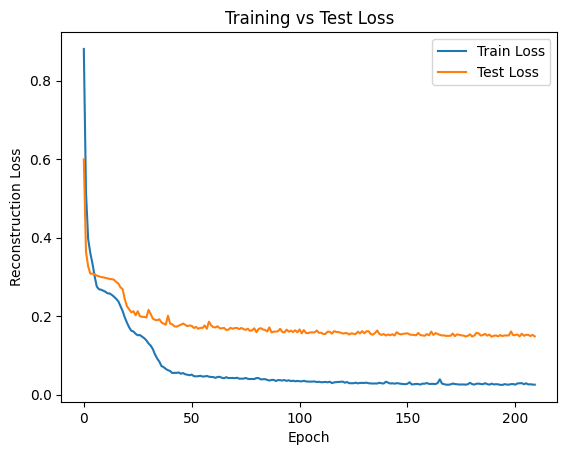

In [11]:
# Create DataLoader
batch_size = 256
train_loader = DataLoader(TensorDataset(X_train_tensor), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor), batch_size=batch_size, shuffle=False)

# Define the Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 2)  # Latent space (2D)
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Initialize the model
input_dim = X_train.shape[1]
model = Autoencoder(input_dim)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with Early Stopping
num_epochs = 1000
patience = 20  # Number of epochs without improvement before stopping
best_loss = float("inf")
counter = 0

train_losses = []
test_losses_history = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for batch in train_loader:
        batch = batch[0]
        optimizer.zero_grad()
        outputs = model(batch)
        loss = criterion(outputs, batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    train_losses.append(epoch_loss / len(train_loader))

    # Evaluate test loss
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for batch in test_loader:
            batch = batch[0]
            outputs = model(batch)
            loss = criterion(outputs, batch)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses_history.append(test_loss)

    # Print progress every 25 epochs
    if (epoch + 1) % 25 == 0 or epoch == 0 or epoch + 1 == num_epochs:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.6f}, Test Loss: {test_loss:.6f}")

    # Check for early stopping
    if test_loss < best_loss:
        best_loss = test_loss
        counter = 0  # Reset patience counter
        torch.save(model.state_dict(), "best_autoencoder.pth")  # Save best model
    else:
        counter += 1  # Increment patience counter
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}, no improvement for {patience} epochs.")
            break  # Stop training

# Load the best model
model.load_state_dict(torch.load("best_autoencoder.pth"))

# Plot the loss curves
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses_history, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Reconstruction Loss")
plt.title("Training vs Test Loss")
plt.legend()
plt.show()




**Task 3: anomaly detection**

From the histogram of the reconstruction error decide what the cutoff should be applied to distinguish anomalies from valid samples, given that the anomaly rate is ~7%.

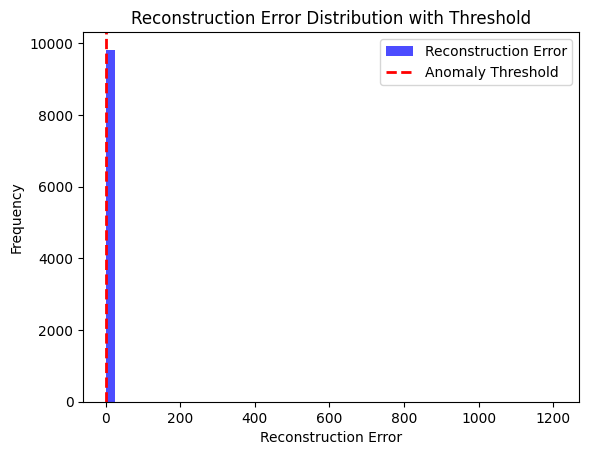

Threshold for anomalies: 0.009731
Detected Anomalies: 688 out of 9820 (7.01%)


In [12]:
# Evaluate Reconstruction Error on Test Data
model.eval()
X_test_reconstructed = model(X_test_tensor).detach().numpy()
reconstruction_error = np.mean((X_test - X_test_reconstructed) ** 2, axis=1)

# Visualizing the reconstruction errors
plt.hist(reconstruction_error, bins=50, alpha=0.7, color='blue', label="Reconstruction Error")
plt.axvline(np.percentile(reconstruction_error, 93), color='red', linestyle='dashed', linewidth=2, label="Anomaly Threshold")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Reconstruction Error Distribution with Threshold")
plt.legend()
plt.show()

# Define threshold at 93rd percentile (top 7% as anomalies)
threshold = np.percentile(reconstruction_error, 93)
anomalies = reconstruction_error > threshold

print(f"Threshold for anomalies: {threshold:.6f}")
print(f"Detected Anomalies: {np.sum(anomalies)} out of {len(reconstruction_error)} ({np.sum(anomalies) / len(reconstruction_error) * 100:.2f}%)")

### Respond (complete by Wednesday 05/02/24)

If you feel you can provide useful advise then respond to another member of the group through the appropriate forum. Responses should be respectful and offer some sort of advise. Try and avoid clogging the forums with support or thank you messages.

In reviewing others code you will discover different ways to tackle the same problem. It is acceptable to copy parts of others code. However whole scale copying from another notebook is not acceptable.

If you stick to the deadline then it will allow yourself and others to have enough time to implement suggestions. From the Schedule you can see that this is not a hard deadline.

The posts on the forum/topic associated with this e-tivity are graded. Below is a link to the rubrics.

https://learn.ul.ie/d2l/lp/rubrics/preview.d2l?ou=49284&rubricId=2620&originTool=quicklinks

### Task 4: VAE (completed by Sunday 09/02/24)

This task is a individual task and should **not** to be uploaded to the Group Locker. No direct support should be given via the forums. Marks will be deducted if the instructions are not followed (see rubrics). This part should be uploaded directly to Brightpsace.

Change the network to be a VAE. Again determine the optimal cutoff and plot the latent variables. Check how good the cutoffs were by constructing a confusion matrix or generating a classification report. Obviously for this task you need to use the Anom column.

**Hint** you can use the model topology from the AE (with the obvious modifications). I found that I had a good model (almost as good and the supervised learning model) when the KL divergence was small. You can print out both the KL divergence and reconstruction loss for each epoch. It can be tricky to train these type of models, so do not be surprised if you do not get a stellar result. What is more important is that you have the correct code to implement the VAE.

### Final Submission (complete by Sunday 09/02/24)

Submit Tasks 1-4 in a single notebook this before the deadline on Sunday.


In [ ]:
## Add additional code cells to implememt the tasks stated above

## Reflection

There are no specific marks allocated for a reflection. However due consideration will be given if pertinent comments or valuable insights are made.